#   

# 作業目標:

    1. 藉由固定的 dataset, 來驗證不同loss function
    2. Dataset 的特性跟我們選用的loss function 對accrancy 的影響
    
    
# 作業重點: 
    請分別選用 "MSE", "binary _crossentropy"
    查看Train/test accurancy and loss rate
    

# 導入必要的函數

In [1]:
from keras.datasets import cifar10
import numpy as np
np.random.seed(10)

Using TensorFlow backend.


# 資料準備

In [2]:
#取得Keras Dataset
(x_img_train,y_label_train),(x_img_test,y_label_test)=cifar10.load_data()

In [3]:
#確認 CIFAR10 Dataset 資料維度
print("train data:",'images:',x_img_train.shape,
      " labels:",y_label_train.shape) 
print("test  data:",'images:',x_img_test.shape ,
      " labels:",y_label_test.shape) 

train data: images: (50000, 32, 32, 3)  labels: (50000, 1)
test  data: images: (10000, 32, 32, 3)  labels: (10000, 1)


In [4]:
#資料正規化
x_img_train_normalize = x_img_train.astype('float32') / 255.0
x_img_test_normalize = x_img_test.astype('float32') / 255.0

In [5]:
#針對Label 做 ONE HOT ENCODE
from keras.utils import np_utils
y_label_train_OneHot = np_utils.to_categorical(y_label_train)
y_label_test_OneHot = np_utils.to_categorical(y_label_test)
y_label_test_OneHot.shape

(10000, 10)

# 建立模型

In [6]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D

In [17]:
model = Sequential()
#卷積層1
model.add(Conv2D(filters=32,kernel_size=(3,3),
                 input_shape=(32, 32,3), 
                 activation='relu', 
                 padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
#卷積層2與池化層2
model.add(Conv2D(filters=64, kernel_size=(3, 3), 
                 activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))        
#建立神經網路(平坦層、隱藏層、輸出層)          
model.add(Flatten())
model.add(Dropout(rate=0.25))          
model.add(Dense(1024, activation='relu'))
model.add(Dropout(rate=0.25))          
#輸出層
model.add(Dense(10, activation='softmax'))
#檢查model 的STACK
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 4096)              0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 4096)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 1024)             

# 載入之前訓練的模型

In [21]:
try:
    model.load_weights("SaveModel/cifarCnnModel.h5")
    print("載入模型成功!繼續訓練模型")
except :    
    print("載入模型失敗!開始訓練一個新模型")

載入模型失敗!開始訓練一個新模型


# 訓練模型 (分別選用 "MSE", "binary _crossentropy"查看Train/test accuracy and loss rate)

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

#定義一個繪圖函數
def show_train_history(train_acc,test_acc):
    plt.plot(train_history.history[train_acc])
    plt.plot(train_history.history[test_acc])
    plt.title('Train History')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['train_acc', 'val_acc'], loc='upper left')
    plt.show()

Train on 40000 samples, validate on 10000 samples
Epoch 1/12
40000/40000 [==============================] - 46s 1ms/step - loss: 0.0902 - accuracy: 0.1033 - val_loss: 0.0899 - val_accuracy: 0.1208
Epoch 2/12
40000/40000 [==============================] - 45s 1ms/step - loss: 0.0900 - accuracy: 0.1148 - val_loss: 0.0897 - val_accuracy: 0.1185
Epoch 3/12
40000/40000 [==============================] - 45s 1ms/step - loss: 0.0898 - accuracy: 0.1214 - val_loss: 0.0895 - val_accuracy: 0.1270
Epoch 4/12
40000/40000 [==============================] - 48s 1ms/step - loss: 0.0897 - accuracy: 0.1300 - val_loss: 0.0894 - val_accuracy: 0.1371
Epoch 5/12
40000/40000 [==============================] - 47s 1ms/step - loss: 0.0895 - accuracy: 0.1362 - val_loss: 0.0892 - val_accuracy: 0.1512
Epoch 6/12
40000/40000 [==============================] - 46s 1ms/step - loss: 0.0894 - accuracy: 0.1424 - val_loss: 0.0890 - val_accuracy: 0.1656
Epoch 7/12
40000/40000 [==============================] - 48s 1ms/st

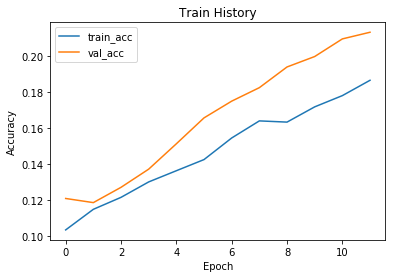

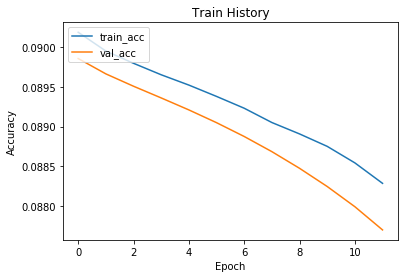

In [18]:
model.compile(loss='MSE', optimizer='sgd', metrics=['accuracy'])
#模型訓練, "Train_History" 把訓練過程所得到的數值存起來
train_history=model.fit(x_img_train_normalize, y_label_train_OneHot,
                        validation_split=0.2,
                        epochs=12, batch_size=64, verbose=1)

show_train_history('accuracy', 'val_accuracy')
show_train_history('loss', 'val_loss')

Train on 40000 samples, validate on 10000 samples
Epoch 1/12
40000/40000 [==============================] - 46s 1ms/step - loss: 0.3122 - accuracy: 0.9000 - val_loss: 0.3050 - val_accuracy: 0.9000
Epoch 2/12
40000/40000 [==============================] - 48s 1ms/step - loss: 0.3042 - accuracy: 0.9000 - val_loss: 0.2964 - val_accuracy: 0.9001
Epoch 3/12
40000/40000 [==============================] - 50s 1ms/step - loss: 0.2970 - accuracy: 0.9002 - val_loss: 0.2906 - val_accuracy: 0.9005
Epoch 4/12
40000/40000 [==============================] - 54s 1ms/step - loss: 0.2923 - accuracy: 0.9004 - val_loss: 0.2870 - val_accuracy: 0.9009
Epoch 5/12
40000/40000 [==============================] - 48s 1ms/step - loss: 0.2890 - accuracy: 0.9005 - val_loss: 0.2848 - val_accuracy: 0.9015
Epoch 6/12
40000/40000 [==============================] - 53s 1ms/step - loss: 0.2864 - accuracy: 0.9008 - val_loss: 0.2818 - val_accuracy: 0.9016
Epoch 7/12
40000/40000 [==============================] - 49s 1ms/st

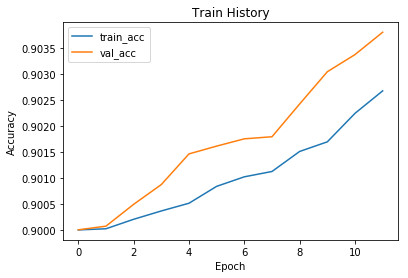

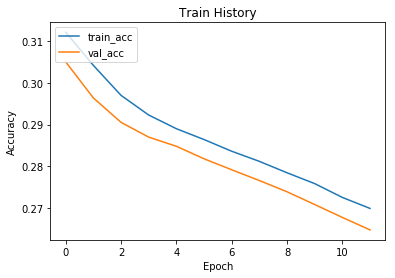

In [20]:
model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])
train_history=model.fit(x_img_train_normalize, y_label_train_OneHot,
                        validation_split=0.2,
                        epochs=12, batch_size=64, verbose=1)

show_train_history('accuracy', 'val_accuracy')
show_train_history('loss', 'val_loss')